
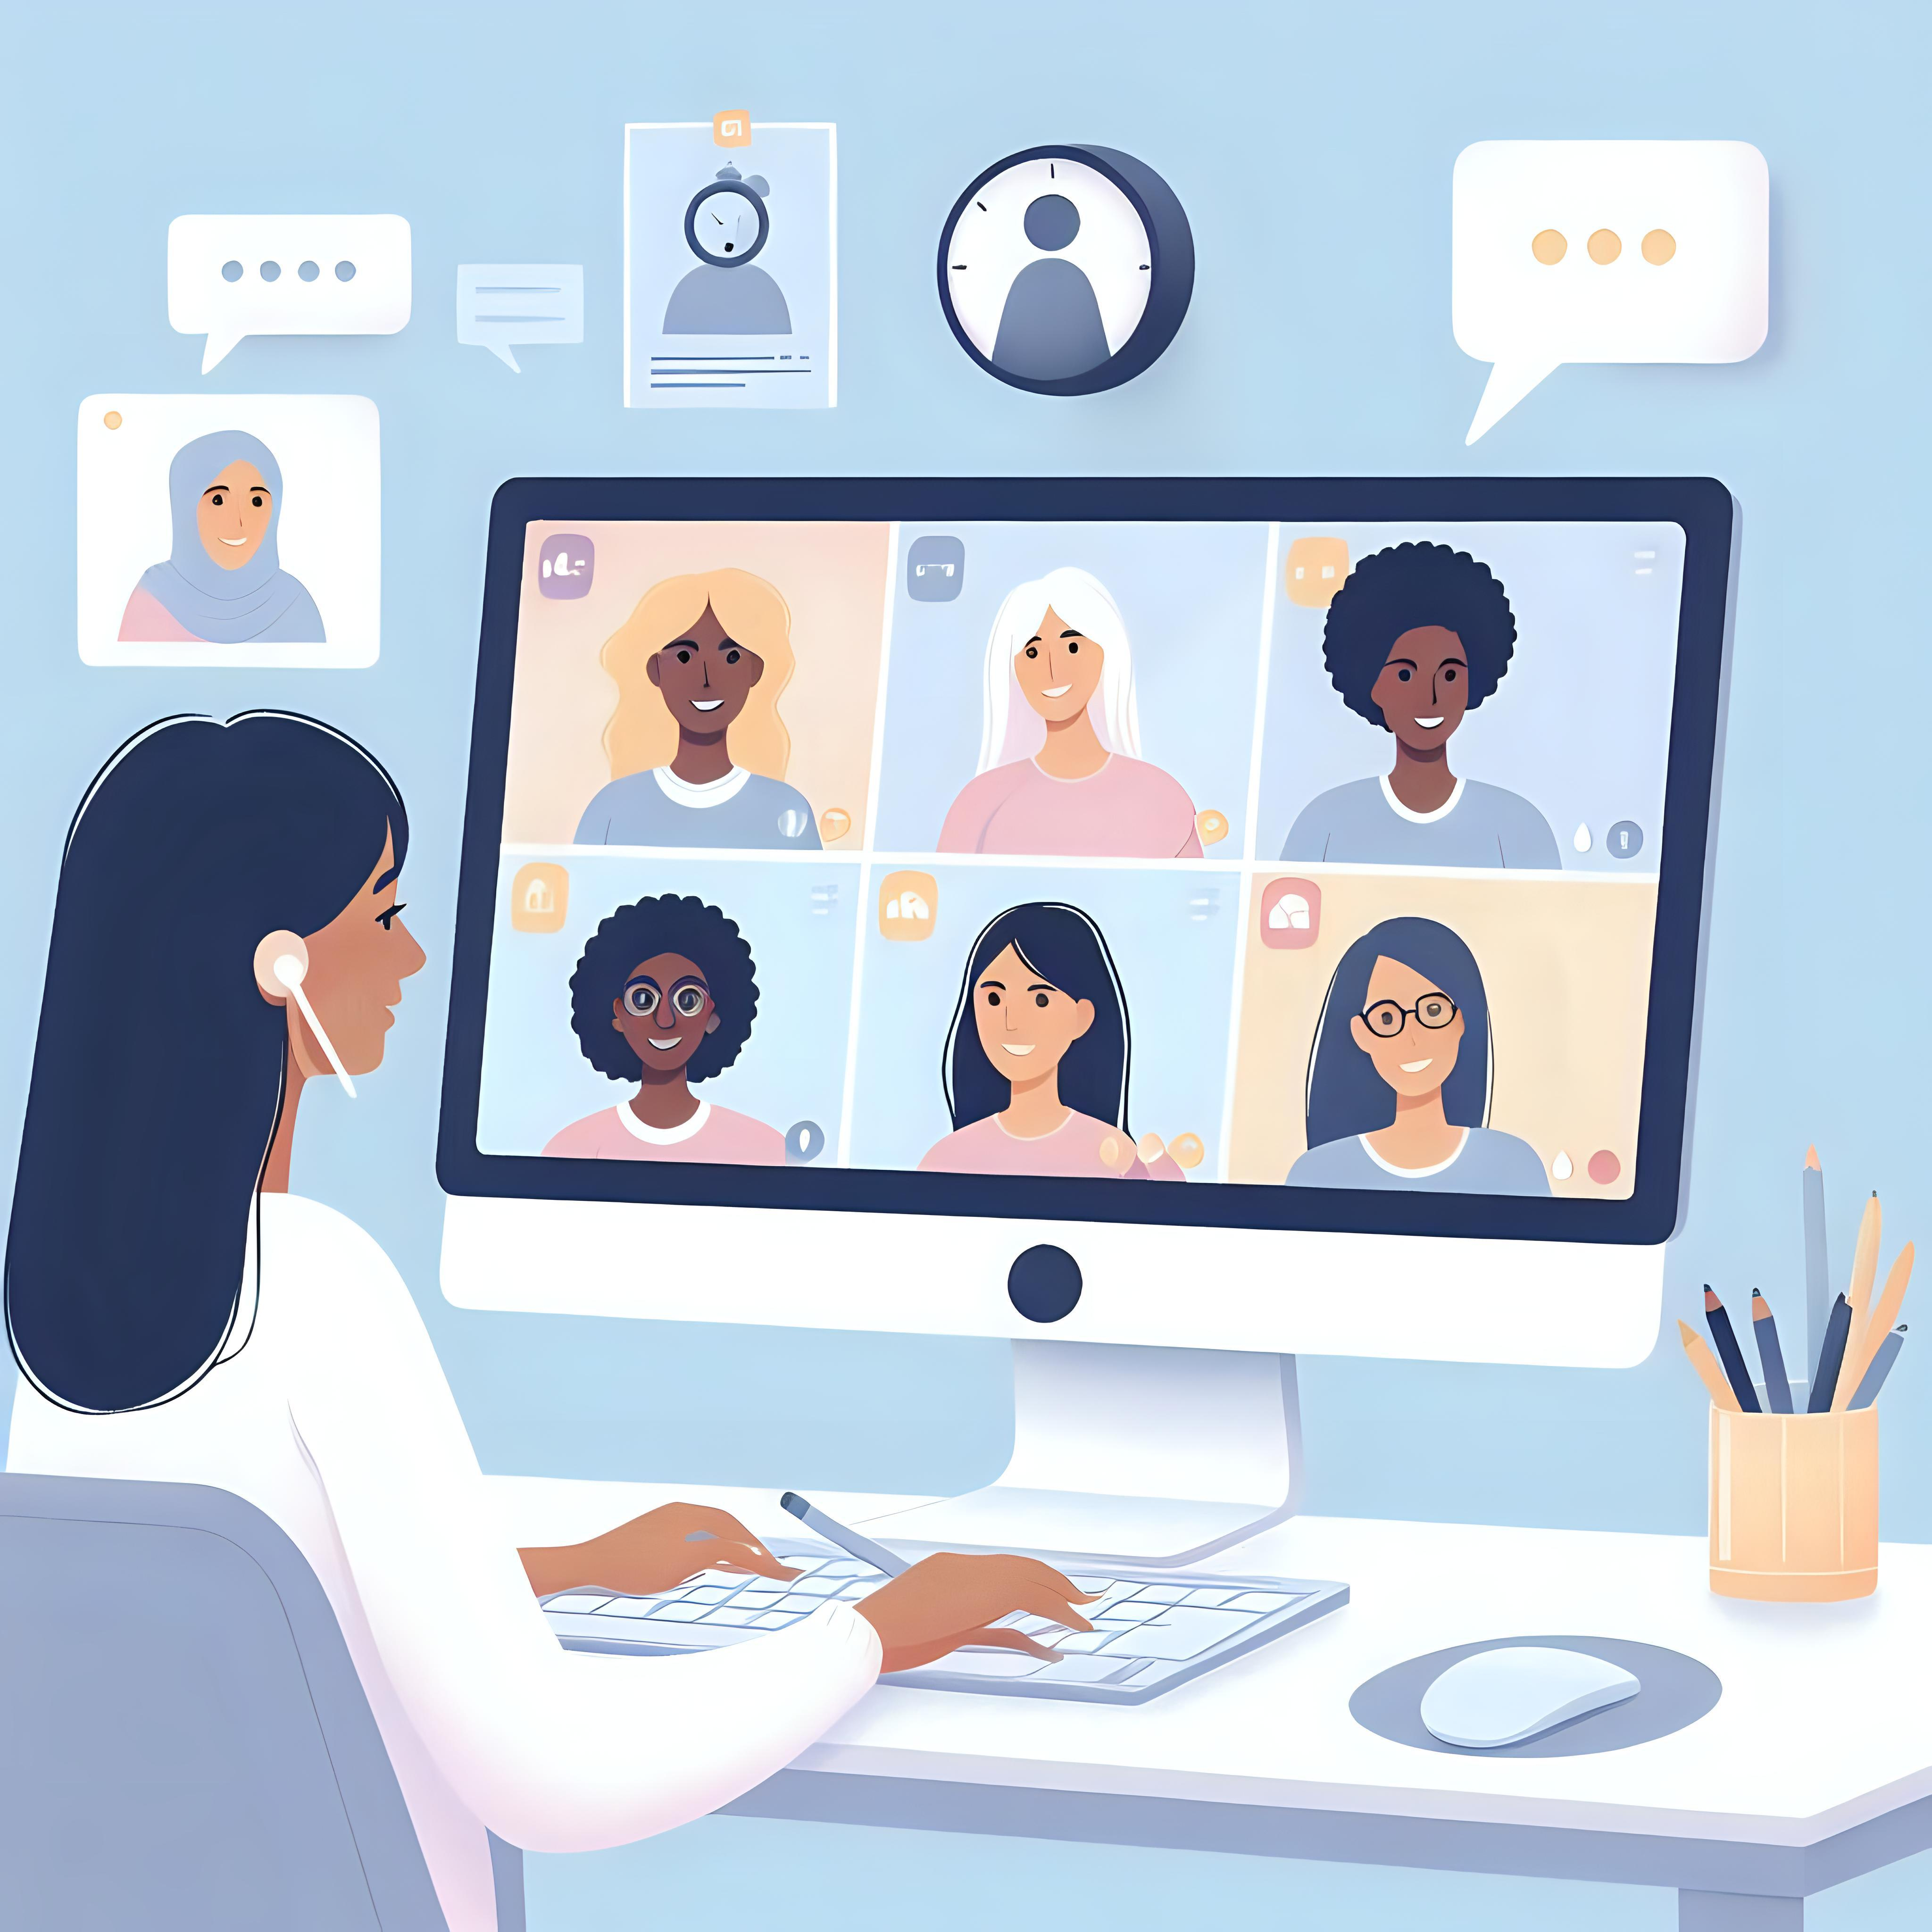

In [4]:
"""Image base64 converter"""
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "foto.jpeg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [5]:
"""LLM functions """
from langchain.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="gemma3")


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "Can you explain this image with a brief ", "image": image_b64}
)

print(query_chain)

Here's a brief explanation of the image:

The image depicts a virtual meeting or video conference. A woman is sitting at a computer, appearing in a video call window where she is interacting with several other diverse people (represented by cartoon avatars) through a video conferencing platform. 

Around the screen, there are icons related to video conferencing, such as a clock, a profile picture, and a chat bubble, suggesting a modern, digital collaboration scenario. 

It represents remote work, online meetings, and global communication.


In [6]:
chain.output_schema.model_json_schema()

{'title': 'StrOutputParserOutput', 'type': 'string'}

Cam accessed successfully!



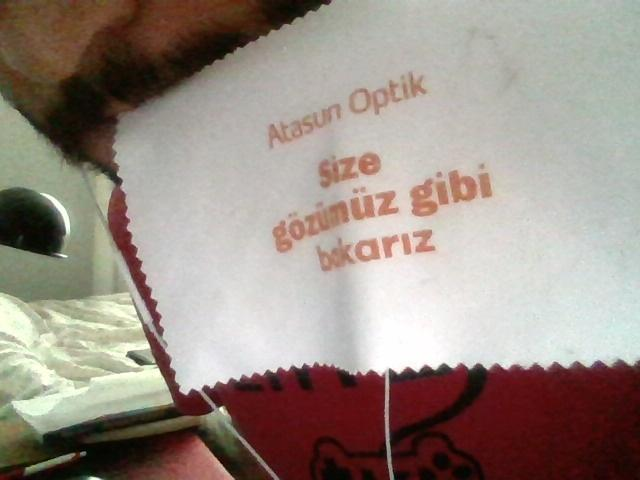

Here's an explanation of the image:

*   **Text:** The image shows a piece of paper from a Turkish optician (Atasun Optik). The text reads: "Sizinüz gibi bakarız"
*   **Translation:** This translates to "We look like you" or "We take care of eyes like yours.”

It’s a common marketing phrase used by opticians to emphasize that they understand and cater to the individual needs of their customers' eyes.


In [7]:
# Kamerayı başlat ve görüntü yakalamayı hazırla.
# Yakalanan görüntüyü ekranda göster.
"""Camera capturing And LLM model"""
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: could not access the cam")
else:
    print("Cam accessed successfully!")
while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Captured Frame",frame)
    else:
        print("Error: Could not capture a frame")
    if cv2.waitKey(1)==ord('q'):
        cv2.destroyAllWindows()
        cv2.imwrite('savedimg.jpeg', frame) 

        file_path = "savedimg.jpeg"
        pil_image = Image.open(file_path)

        image_b64 = convert_to_base64(pil_image)
        plt_img_base64(image_b64)

        break

cap.release()

from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "Can you explain this image with a brief ", "image": image_b64}
)

print(query_chain)


In [ ]:
"""Speak to Text"""
import speech_recognition as sr

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Microphone as source
# listening the speech and store in audio_text variable
with sr.Microphone() as source:
    print("Talk")
    audio_text = r.listen(source)
    print("Time over, thanks")
    # recoginze_() method will throw a request
    # error if the API is unreachable,
    # hence using exception handling
    
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print("Text: "+ text)
        
    except:
         print("Sorry, I did not get that")
print(text)

Talk
Time over, thanks
Text: change Skype me this image with a brief
change Skype me this image with a brief


In [ ]:
def speechrec():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Talk")
        audio_text = r.listen(source)
        print("Time over, thanks")
        # recoginze_() method will throw a request
        # error if the API is unreachable,
        # hence using exception handling
        
        try:
            # using google speech recognition
            text = r.recognize_google(audio_text)
            print("Text: "+ text)
            
        except:
            print("Sorry, I did not get that")
    print(text)


In [ ]:
""" Text to speech """
from gtts import gTTS
import os
def speech(output):

    tts = gTTS(output, lang="en")
    tts.save("test.mp3")
    os.system("start test.mp3")



In [10]:
"""Chain experiment """
chain = prompt_func | llm | StrOutputParser() | speech
chain.invoke(
    {"text": "Can you explain this image with a brief ", "image": image_b64}
)

In [11]:
"text to speak kismina bakilicak birlestirilmeye calisinalacak"

'text to speak kismina bakilicak birlestirilmeye calisinalacak'

In [31]:
from TTS.api import TTS
tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

# generate speech by cloning a voice using default settings
tts.tts_to_file(text="It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent.",
                file_path="output.wav",
                speaker_wav="/path/to/target/speaker.wav",
                language="en")


ModuleNotFoundError: No module named 'TTS'

In [ ]:
# Faster Whisper modelini yükle ve model boyutunu ayarla.
# Whisper modelini başlat (Cihaz ve işlem tipi ayarları).
# Ses dosyasını metne dönüştür (Transkripsiyon).
import sounddevice as sd
import numpy as np
import queue
import threading
from faster_whisper import WhisperModel

# Settings
samplerate = 16000
block_duration = 0.5 # seconds
chunk_duration = 0.5 # seconds
channels = 1

frames_per_block = int(samplerate * block_duration)
frames_per_chunk = int(samplerate * chunk_duration)

audio_queue = queue. Queue()
audio_buffer = []



# Model setup: medium.en + float16 (optimized for 3080)
model = WhisperModel("small.en", device="cuda", compute_type="float32")

def audio_callback(indata, frames, time, status) :
    if status:
        print(status)
    audio_queue.put(indata.copy())

def recorder():
    with sd. InputStream(samplerate=samplerate, channels=channels,
                    callback=audio_callback, blocksize=frames_per_block):
        print("Listening ... Press Ctr1+C to stop.")
        while True:
            sd.sleep(100)

def transcriber():
    global audio_buffer
    while True:
            block = audio_queue.get()
            audio_buffer. append(block)

            total_frames = sum(len(b) for b in audio_buffer)
            if total_frames >= frames_per_chunk:
                audio_data = np.concatenate(audio_buffer) [:frames_per_chunk]
                audio_buffer = [] # Clear buffer

                audio_data = audio_data.flatten().astype(np.float32)

                # Transcription without timestamps
                segments, _ = model.transcribe(
                audio_data,
                language="en",
                beam_size=1 # Max speed

                )

                for segment in segments:
                    print(f"{segment.text}")
# Start Threads
threading.Thread(target=recorder,daemon=True).start()
transcriber()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\dev\assistant\local-opensource-ai-assistant\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yahya\.cache\huggingface\hub\models--Systran--faster-whisper-small.en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate devel

Listening ... Press Ctr1+C to stop.
 .
 .
 .
 .
 Thank you.
 Thank you.
 .
 .
 Thank you.


In [2]:
# Faster Whisper modelini yükle ve model boyutunu ayarla.
# Whisper modelini başlat (Cihaz ve işlem tipi ayarları).
# Ses dosyasını metne dönüştür (Transkripsiyon).
from faster_whisper import WhisperModel

model_size = "large-v3"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

segments, info = model.transcribe("welcome.mp3", beam_size=5)

print("Detected language '%s' with probability %f" % (info.language, info.language_probability))

for segment in segments:
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))

Detected language 'en' with probability 0.980469
[0.00s -> 1.72s]  Welcome to GeeksforGeeks.
